In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("shopping_trends.csv")
df.head(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [4]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [5]:
df.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.shape

(3900, 19)

In [8]:
for i in df.columns :
    print(i,df[i].nunique())

Customer ID 3900
Age 53
Gender 2
Item Purchased 25
Category 4
Purchase Amount (USD) 81
Location 50
Size 4
Color 25
Season 4
Review Rating 26
Subscription Status 2
Payment Method 6
Shipping Type 6
Discount Applied 2
Promo Code Used 2
Previous Purchases 50
Preferred Payment Method 6
Frequency of Purchases 7


# Age

<Axes: xlabel='Age', ylabel='Density'>

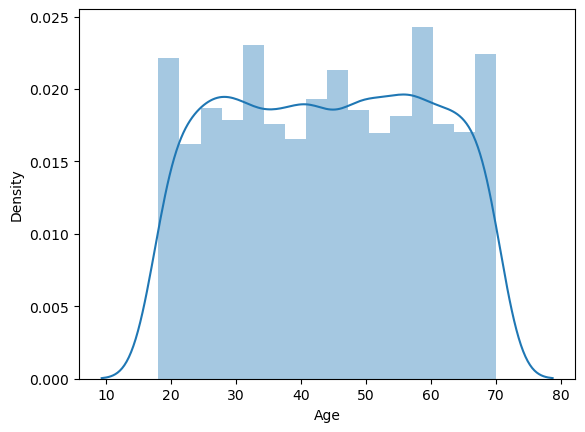

In [9]:
sns.distplot(df['Age'])

In [10]:
average_age = df['Age'].mean()
print("Average Age:", average_age)

Average Age: 44.06846153846154


# Gender 

Text(0.5, 1.0, 'Gender Difference')

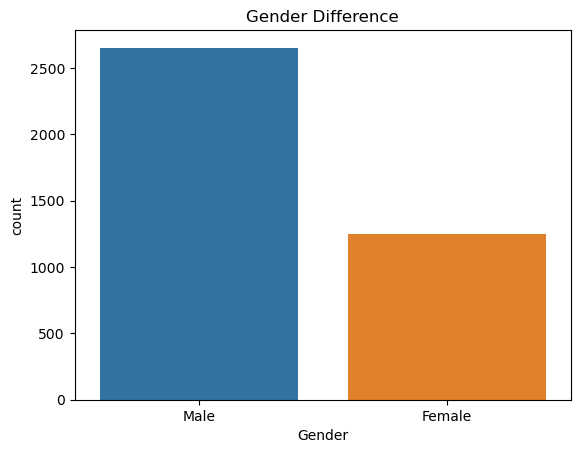

In [11]:
sns.countplot(x='Gender',data=df)
plt.title("Gender Difference")

In [12]:
average_rating_male = df[df['Gender'] == 'Male']['Review Rating'].mean()
average_rating_female = df[df['Gender'] == 'Female']['Review Rating'].mean()
print("Average Review Rating for Male Customers:", average_rating_male)
print("Average Review Rating for Female Customers:", average_rating_female)

Average Review Rating for Male Customers: 3.7539592760180995
Average Review Rating for Female Customers: 3.741426282051282


# Category

<Axes: xlabel='Category', ylabel='count'>

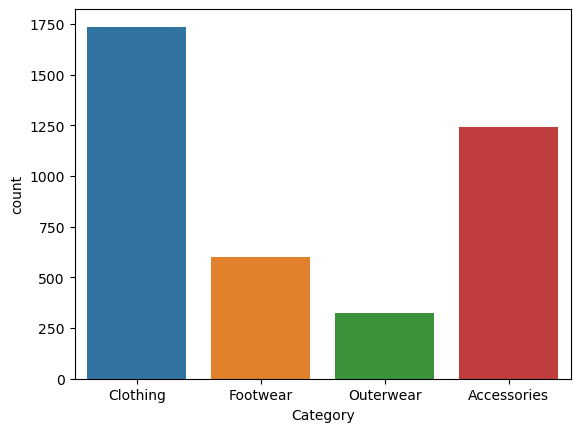

In [13]:
sns.countplot(x='Category',data=df)

<Axes: xlabel='Category', ylabel='count'>

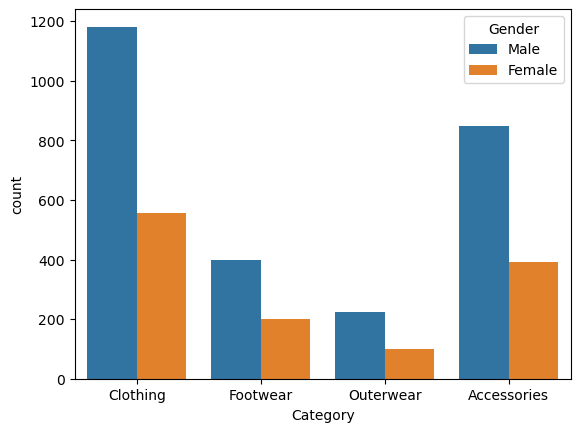

In [14]:
sns.countplot(x='Category',hue='Gender',data=df)

In [15]:
total_purchase_by_category = df.groupby('Category')['Purchase Amount (USD)'].sum()
print("Total Purchase Amount by Category:")
print(total_purchase_by_category)

Total Purchase Amount by Category:
Category
Accessories     74200
Clothing       104264
Footwear        36093
Outerwear       18524
Name: Purchase Amount (USD), dtype: int64


# Item Purchase

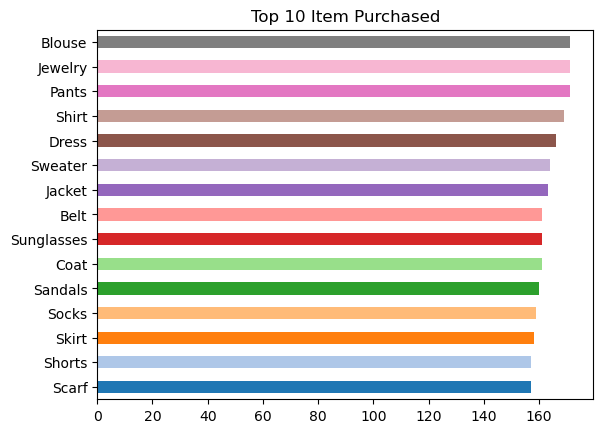

In [16]:
x= df['Item Purchased'].value_counts().sort_values(ascending=True)
x=x[10:]
x.plot(kind='barh',color = sns.color_palette('tab20'))
plt.title("Top 10 Item Purchased");

In [17]:
most_common_item = df['Item Purchased'].mode()[0]
print("Most Common Item Purchased:", most_common_item)

Most Common Item Purchased: Blouse


# Locations

Text(0.5, 1.0, 'Top  10 Locations')

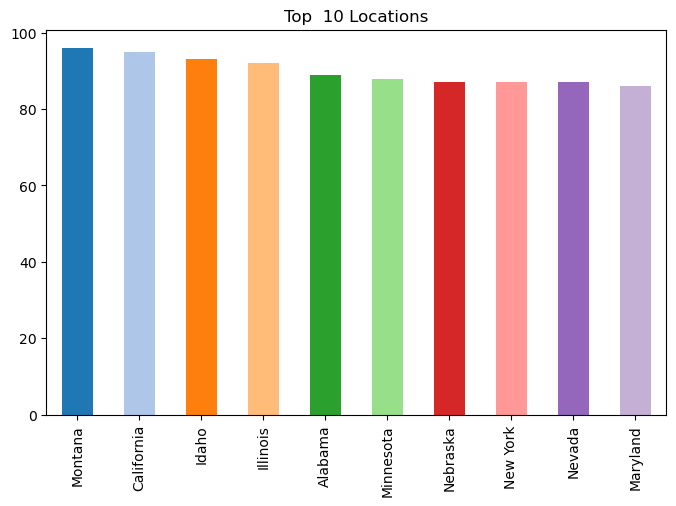

In [18]:
x= df['Location'].value_counts().sort_values(ascending=False)
x=x[:10]
plt.figure(figsize=(8,5))
x.plot(kind='bar',color = sns.color_palette('tab20'))
plt.title("Top  10 Locations")

# Size

Text(0.5, 1.0, 'Size')

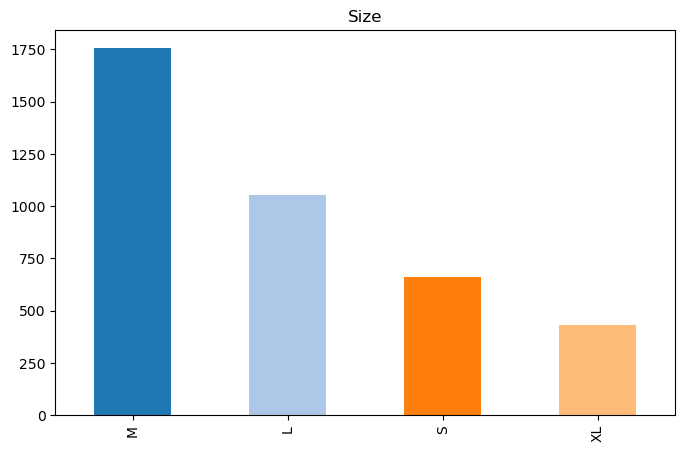

In [19]:
x= df['Size'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(8,5))
x.plot(kind='bar',color = sns.color_palette('tab20'))
plt.title("Size")

Text(0.5, 1.0, 'Color')

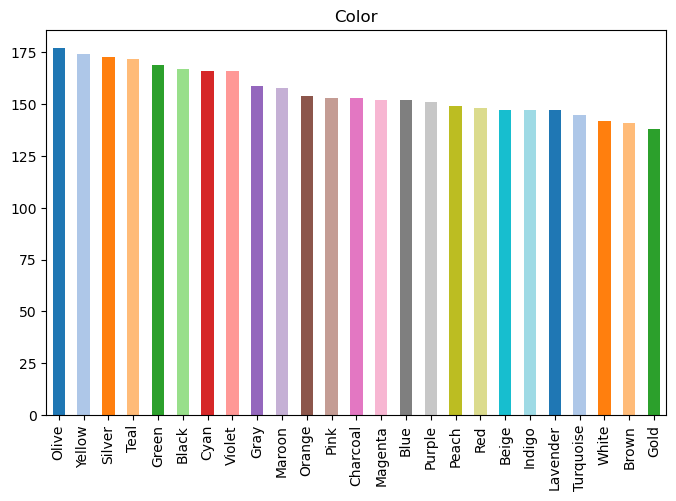

In [20]:
x= df['Color'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(8,5))
x.plot(kind='bar',color = sns.color_palette('tab20'))
plt.title("Color")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'Gray'),
  Text(1, 0, 'Maroon'),
  Text(2, 0, 'Turquoise'),
  Text(3, 0, 'White'),
  Text(4, 0, 'Charcoal'),
  Text(5, 0, 'Silver'),
  Text(6, 0, 'Pink'),
  Text(7, 0, 'Purple'),
  Text(8, 0, 'Olive'),
  Text(9, 0, 'Gold'),
  Text(10, 0, 'Violet'),
  Text(11, 0, 'Teal'),
  Text(12, 0, 'Lavender'),
  Text(13, 0, 'Black'),
  Text(14, 0, 'Green'),
  Text(15, 0, 'Peach'),
  Text(16, 0, 'Red'),
  Text(17, 0, 'Cyan'),
  Text(18, 0, 'Brown'),
  Text(19, 0, 'Beige'),
  Text(20, 0, 'Orange'),
  Text(21, 0, 'Indigo'),
  Text(22, 0, 'Yellow'),
  Text(23, 0, 'Magenta'),
  Text(24, 0, 'Blue')])

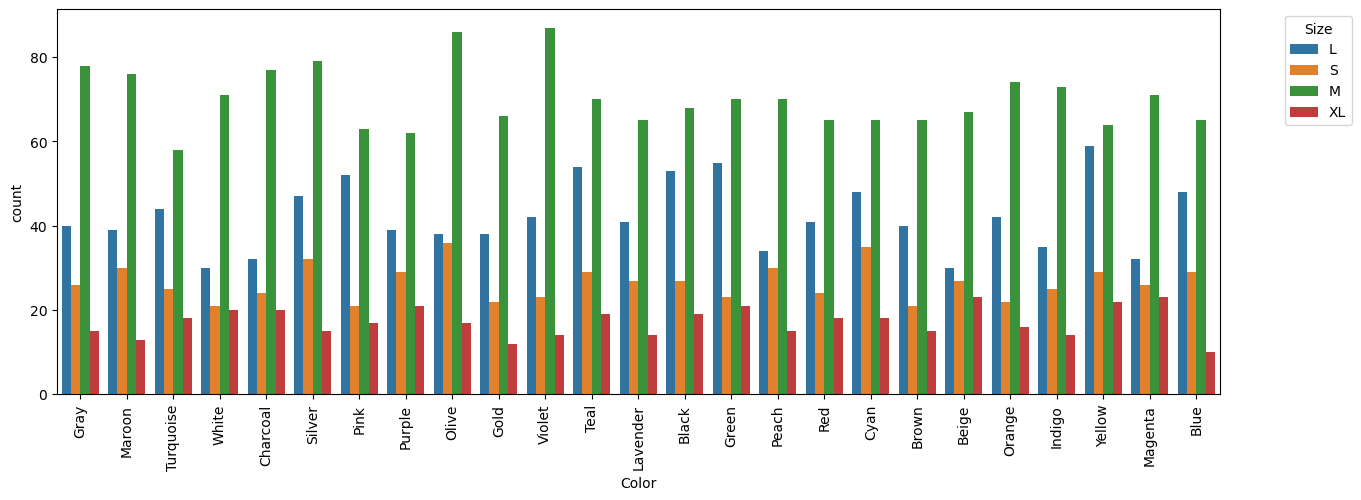

In [21]:
plt.figure(figsize=(15,5))
sns.countplot(x='Color',hue='Size',data=df)
plt.legend(title="Size",bbox_to_anchor=(1.05,1))
plt.xticks(rotation=90)

# Season

Text(0.5, 1.0, ' Season Distribution')

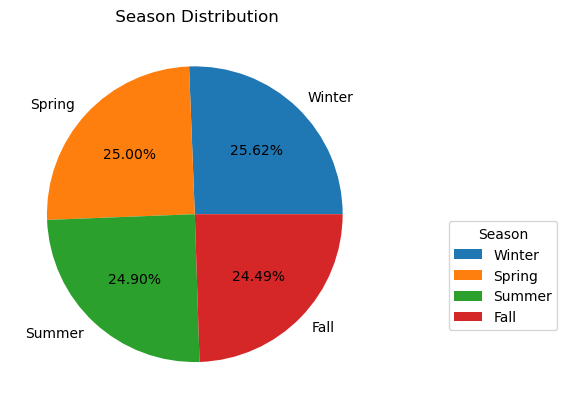

In [22]:
plot2= df['Season'].value_counts()
label='Winter', 'Spring', 'Summer', 'Fall'
plt.pie(plot2,labels=label,autopct='%1.2f%%')
plt.legend(title="Season",bbox_to_anchor=(1, 0, 0.5, 0.5))
plt.title(" Season Distribution")

In [23]:
most_common_season = df['Season'].mode()[0]
print("Most Common Season for Purchases:", most_common_season)

Most Common Season for Purchases: Spring


In [24]:
average_age_summer = df[df['Season'] == 'Summer']['Age'].mean()
print("Average Age of Customers in the Summer Season:", average_age_summer)

Average Age of Customers in the Summer Season: 43.973821989528794


# SubScription

(array([0, 1]), [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

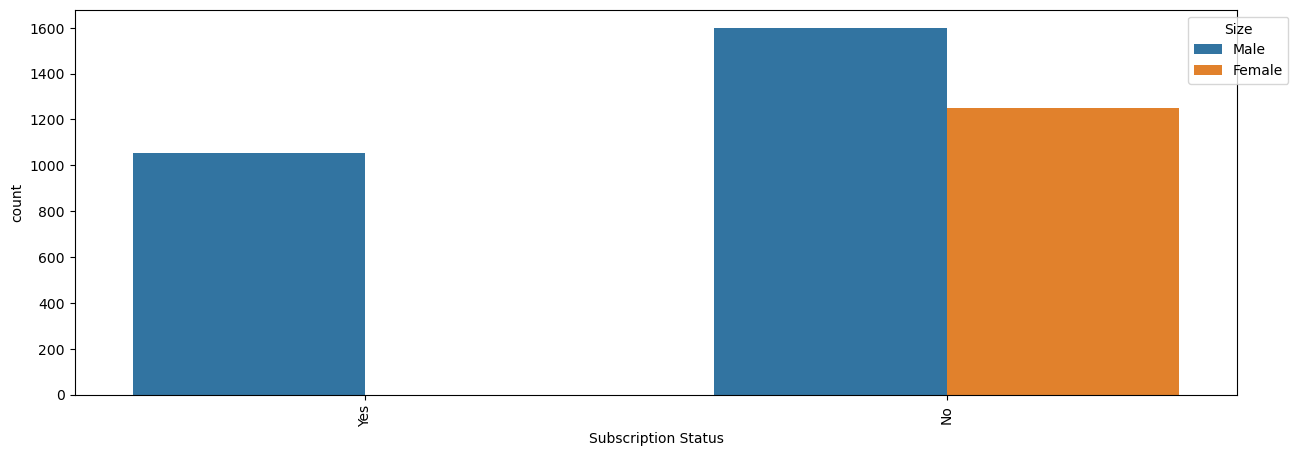

In [25]:
plt.figure(figsize=(15,5))
sns.countplot(x='Subscription Status',hue='Gender',data=df)
plt.legend(title="Size",bbox_to_anchor=(1.05,1))
plt.xticks(rotation=90)

In [26]:
subscription_count = df[df['Subscription Status'] == 'Yes']['Customer ID'].count()
print("Number of Customers with Subscription: ", subscription_count)

Number of Customers with Subscription:  1053


In [27]:
avg_purchase_subscription_yes = df[df['Subscription Status'] == 'Yes']['Purchase Amount (USD)'].mean()
avg_purchase_subscription_no = df[df['Subscription Status'] == 'No']['Purchase Amount (USD)'].mean()
print("Average Purchase Amount for Subscription 'Yes':", avg_purchase_subscription_yes)
print("Average Purchase Amount for Subscription 'No':", avg_purchase_subscription_no)

Average Purchase Amount for Subscription 'Yes': 59.49192782526116
Average Purchase Amount for Subscription 'No': 59.865121180189675


# Payment Method

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Credit Card'),
  Text(1, 0, 'Bank Transfer'),
  Text(2, 0, 'Cash'),
  Text(3, 0, 'PayPal'),
  Text(4, 0, 'Venmo'),
  Text(5, 0, 'Debit Card')])

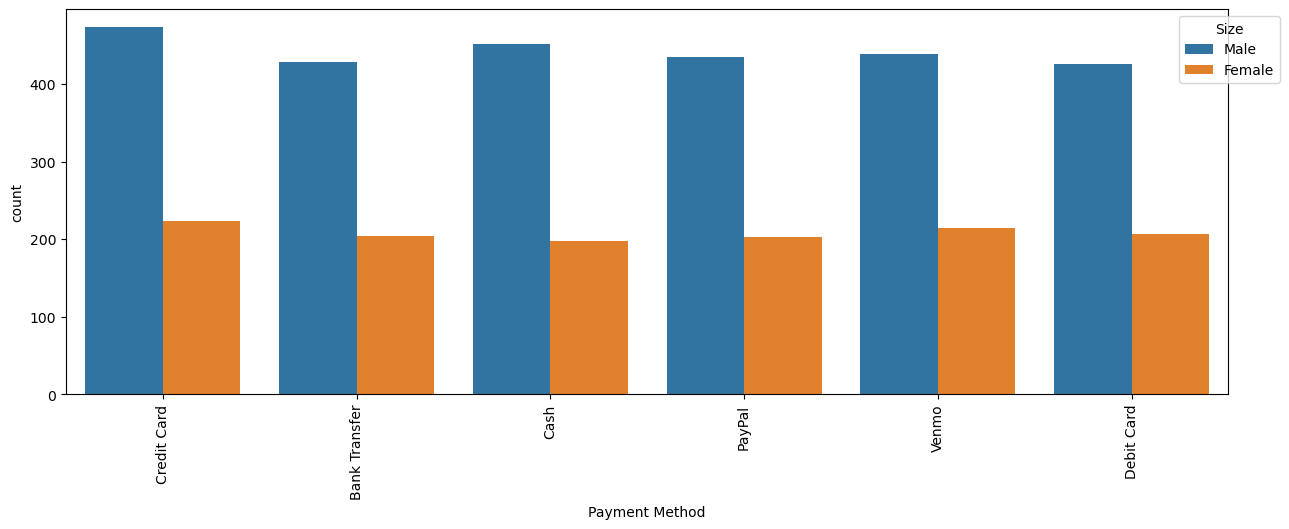

In [28]:
plt.figure(figsize=(15,5))
sns.countplot(x='Payment Method',hue='Gender',data=df)
plt.legend(title="Size",bbox_to_anchor=(1.05,1))
plt.xticks(rotation=90)

In [29]:
df['Payment Method'].unique()

array(['Credit Card', 'Bank Transfer', 'Cash', 'PayPal', 'Venmo',
       'Debit Card'], dtype=object)

Text(0.5, 1.0, 'Payment Method')

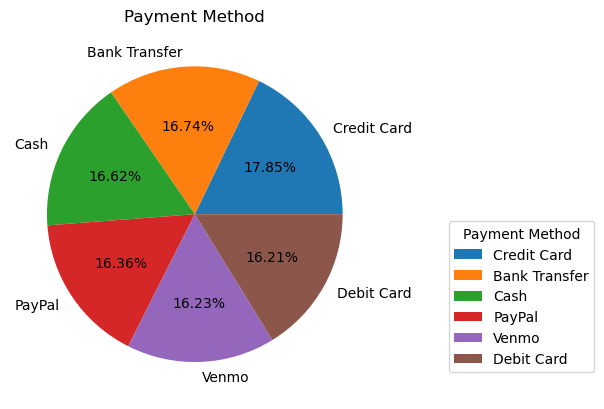

In [30]:
plot2= df['Payment Method'].value_counts()
label='Credit Card', 'Bank Transfer', 'Cash', 'PayPal', 'Venmo','Debit Card'
plt.pie(plot2,labels=label,autopct='%1.2f%%')
plt.legend(title="Payment Method",bbox_to_anchor=(1, 0, 0.6, 0.5))
plt.title("Payment Method")

In [31]:
most_common_payment_method = df['Payment Method'].mode()[0]
print("Most Common Payment Method:", most_common_payment_method)

Most Common Payment Method: Credit Card


# Shipping

In [32]:
df['Shipping Type'].unique()

array(['Express', 'Free Shipping', 'Next Day Air', 'Standard',
       '2-Day Shipping', 'Store Pickup'], dtype=object)

Text(0.5, 1.0, 'Shipping Type Distribution')

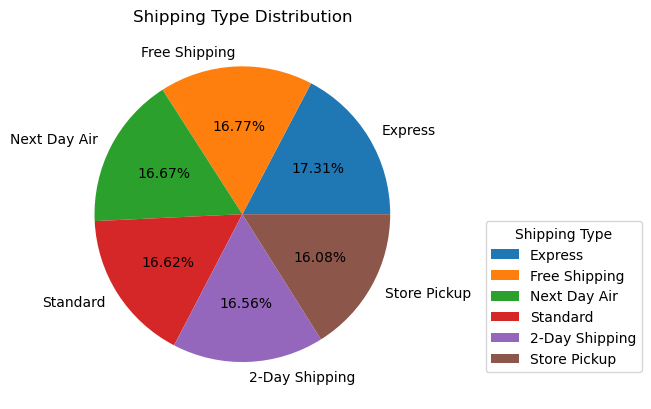

In [33]:
plot2= df['Shipping Type'].value_counts()
label= 'Express','Free Shipping','Next Day Air','Standard','2-Day Shipping','Store Pickup'
plt.pie(plot2,labels=label,autopct='%1.2f%%')
plt.legend(title="Shipping Type",bbox_to_anchor=(1, 0, 0.6, 0.5))
plt.title("Shipping Type Distribution")

In [34]:
most_common_payment_method = df['Payment Method'].mode()[0]
print("Most Common Payment Method:", most_common_payment_method)

Most Common Payment Method: Credit Card


Text(0.5, 1.0, 'Size')

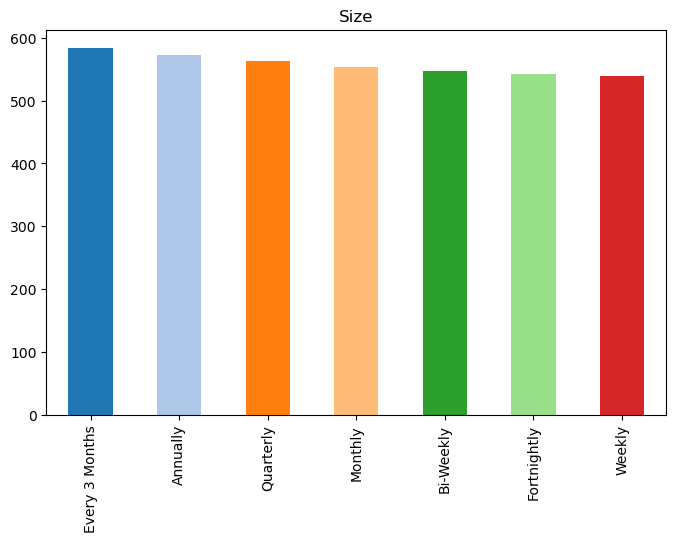

In [35]:
x= df['Frequency of Purchases'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(8,5))
x.plot(kind='bar',color = sns.color_palette('tab20'))
plt.title("Size")

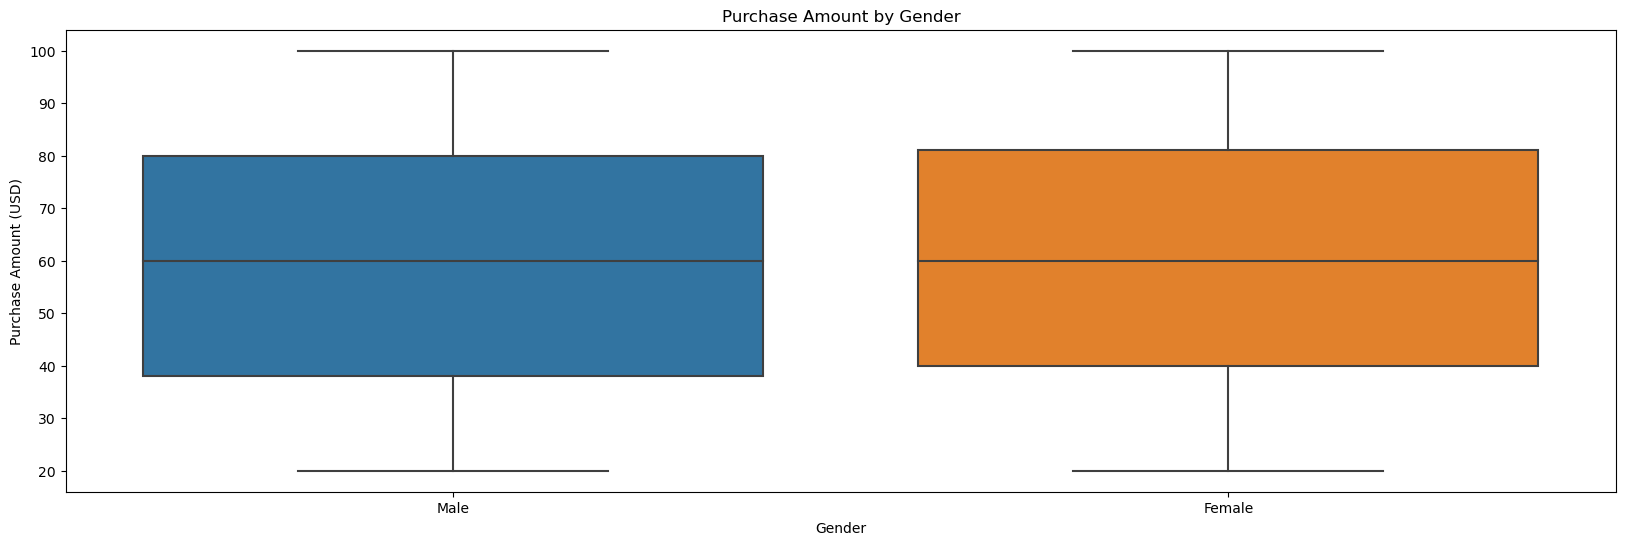

In [36]:
plt.figure(figsize = (20, 6))
sns.boxplot(x='Gender', y='Purchase Amount (USD)', data=df)
plt.title('Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Purchase Amount (USD)')
plt.show()

In [37]:
total_purchase_by_gender = df.groupby('Gender')['Purchase Amount (USD)'].sum()
print("Total Purchase Amount by Gender:")
print(total_purchase_by_gender)

Total Purchase Amount by Gender:
Gender
Female     75191
Male      157890
Name: Purchase Amount (USD), dtype: int64


In [38]:
average_rating_male = df[df['Gender'] == 'Male']['Review Rating'].mean()
average_rating_female = df[df['Gender'] == 'Female']['Review Rating'].mean()
print("Average Review Rating for Male Customers:", average_rating_male)
print("Average Review Rating for Female Customers:", average_rating_female)

Average Review Rating for Male Customers: 3.7539592760180995
Average Review Rating for Female Customers: 3.741426282051282


# Machine Learning

In [39]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

In [40]:
train = df
train = df.drop(['Customer ID', 'Age', 'Gender','Location','Discount Applied', 'Promo Code Used'],1)

In [41]:
train.head()

,Item Purchased,Category,Purchase Amount (USD),Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,Blouse,Clothing,53,L,Gray,Winter,3.1,Yes,Credit Card,Express,14,Venmo,Fortnightly
1,Sweater,Clothing,64,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,2,Cash,Fortnightly
2,Jeans,Clothing,73,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,23,Credit Card,Weekly
3,Sandals,Footwear,90,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,49,PayPal,Weekly
4,Blouse,Clothing,49,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,31,PayPal,Annually


In [42]:
X = pd.get_dummies(train)

In [43]:
y=df['Discount Applied']

# Logistic Regression

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
logic = LogisticRegression()

In [48]:
logic.fit(X_train,y_train)

LogisticRegression()

In [49]:
print((logic.score(X_test,y_test))*100,"%")

84.1025641025641 %
